### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Dataset

In [2]:
data = pd.read_csv("Datasets/pima-data.csv")

In [3]:
data.shape

(768, 10)

In [4]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
data.tail()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [6]:
# check if any null value is present
data.isnull().values.any()

False

In [7]:
data.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


## Changing the diabetes column data from boolean to number

In [8]:
diabetes_map = {True: 1, False: 0}
data['diabetes'] = data['diabetes'].map(diabetes_map)

In [10]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 60.1 KB


## Analysis over Dataset

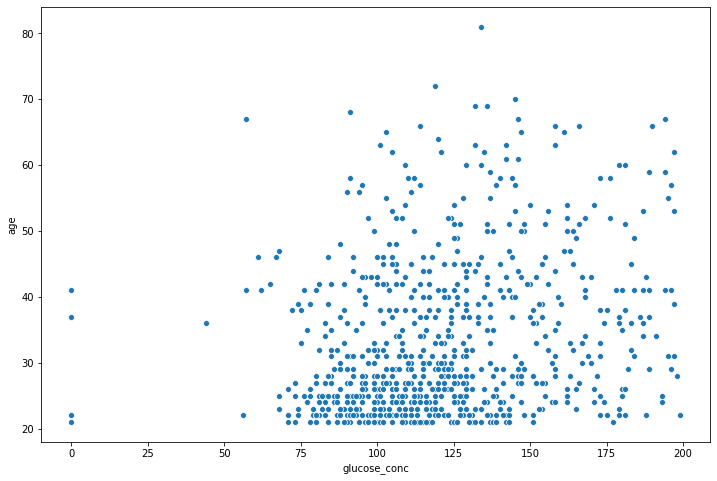

In [36]:
from scipy.stats import norm
plt.figure(figsize=(12,8))
sns.scatterplot(x='glucose_conc',y='age',data=data,palette='pastel')

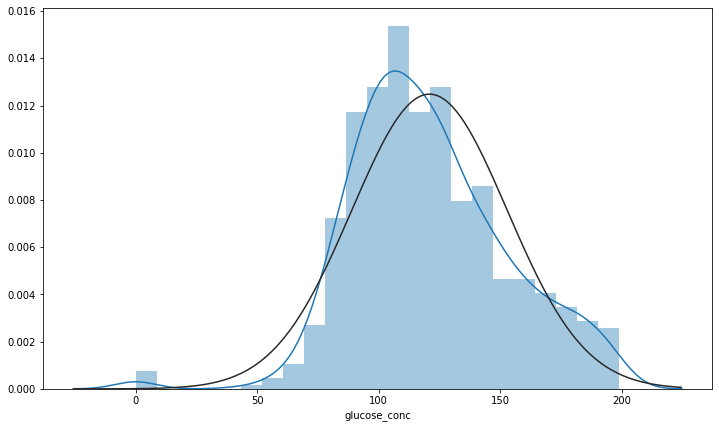

In [38]:
plt.figure(figsize=(12,7))
sns.distplot(data['glucose_conc'],kde=True,fit=norm)

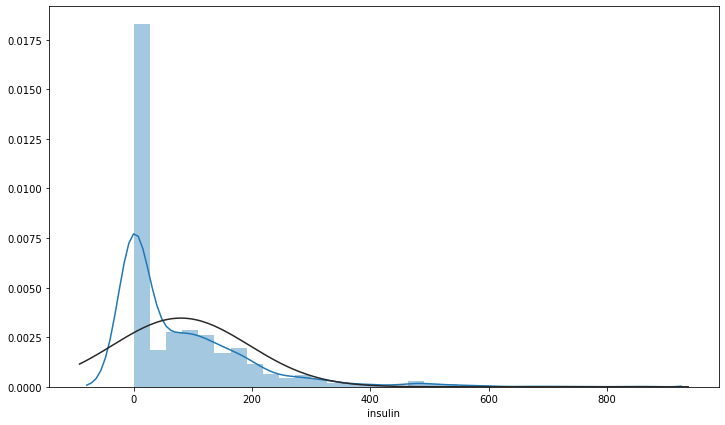

In [41]:
plt.figure(figsize=(12,7))
sns.distplot(data['insulin'],kde=True,fit=norm)

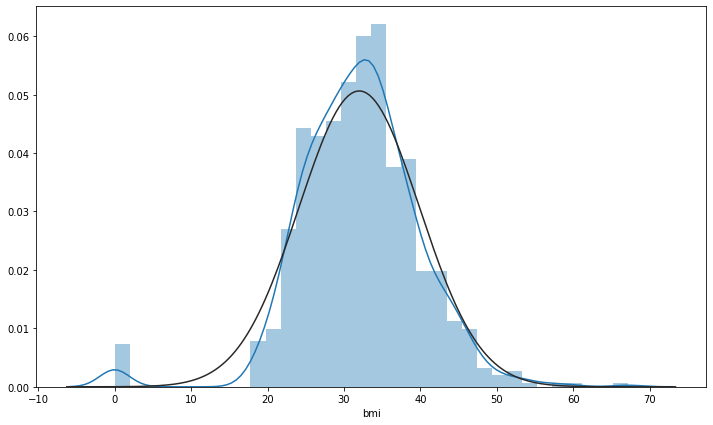

In [42]:
plt.figure(figsize=(12,7))
sns.distplot(data['bmi'],kde=True,fit=norm)

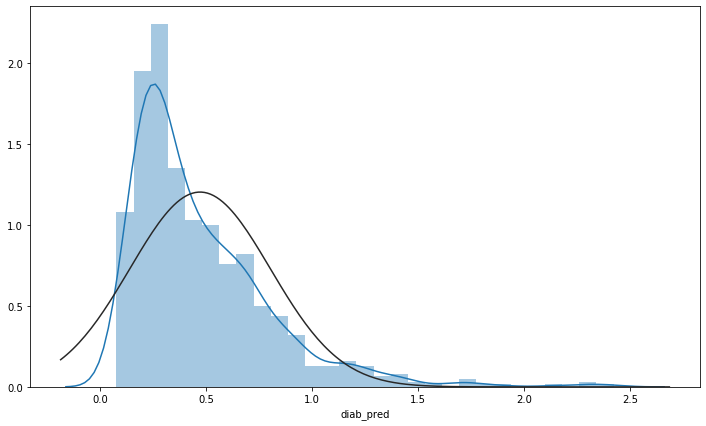

In [44]:
plt.figure(figsize=(12,7))
sns.distplot(data['diab_pred'],kde=True, fit=norm)

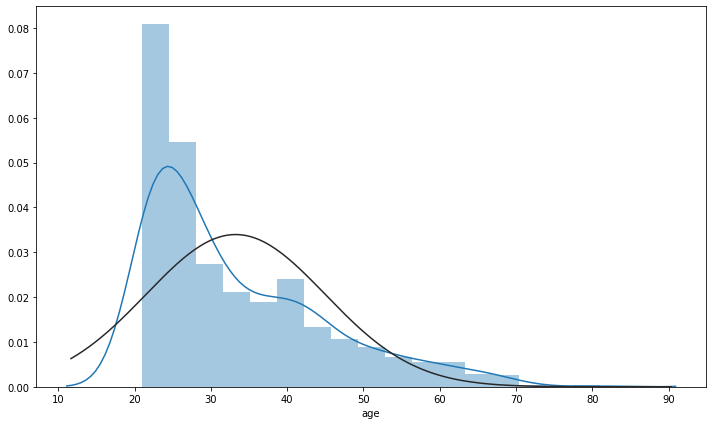

In [45]:
plt.figure(figsize=(12,7))
sns.distplot(data['age'],kde=True, fit=norm)

In [11]:
diabetes_true_count = len(data.loc[data['diabetes'] == True])
diabetes_false_count = len(data.loc[data['diabetes'] == False])

In [12]:
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [13]:
# Train Test Split
from sklearn.model_selection import train_test_split
feature_columns = ['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'diab_pred', 'age', 'skin']
predicted_class = ['diabetes']
X = data[feature_columns].values
y = data[predicted_class].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

## Apply SimpleImputer for missing data

In [53]:
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=0, strategy="mean")
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

## Applying Classification Algorithms

In [16]:
# RandomForest Algorithm
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)
random_forest_model.fit(X_train, y_train.ravel())
randomforest_prediction = random_forest_model.predict(X_test)

In [48]:
## SVC Algorithm
from sklearn.svm import SVC
svc_model = SVC(kernel = 'rbf', random_state = 0)
svc_model.fit(X_train, y_train.ravel())
svc_prediction = svc_model.predict(X_test)

In [49]:
# KNeighborsClassifier Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train.ravel())
knn_prediction = knn_classifier.predict(X_test)

In [50]:
# Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
decisiontree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decisiontree_classifier.fit(X_train, y_train.ravel())
decisiontree_prediction = decisiontree_classifier.predict(X_test)

## Observing and Analysing Accuracy

In [52]:
from sklearn import metrics

print("Accuracy RandomForest = {0:.3f}".format(metrics.accuracy_score(y_test, randomforest_prediction)))
print("Accuracy SVC = {0:.3f}".format(metrics.accuracy_score(y_test, svc_prediction)))
print("Accuracy KNN = {0:.3f}".format(metrics.accuracy_score(y_test, knn_prediction)))
print("Accuracy Decision Tree = {0:.3f}".format(metrics.accuracy_score(y_test, decisiontree_prediction)))

Accuracy RandomForest = 0.736
Accuracy SVC = 0.714
Accuracy KNN = 0.697
Accuracy Decision Tree = 0.710
